<a href="https://colab.research.google.com/github/240609/MLF/blob/main/SVM_exercise" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [11]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

(150, 4)
(135, 4)
(15, 4)
(135,)
(15,)
[1 0 1 0 2 2 2 1 2 2 2 1 2 0 1 2 2 1 0 1 0 0 2 0 1 0 2 2 1 1 2 2 0 2 1 2 2
 2 0 1 0 0 0 0 0 0 1 0 1 2 2 1 0 1 0 0 1 0 2 2 2 1 0 0 1 0 0 1 0 1 0 1 0 2
 2 1 2 2 2 1 0 0 0 0 2 1 0 0 1 0 2 2 1 2 0 0 1 0 2 2 0 2 1 2 0 0 2 1 1 1 0
 0 2 1 0 0 1 2 0 2 1 0 1 1 2 2 2 1 2 2 2 1 1 1 0]


In [15]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.8

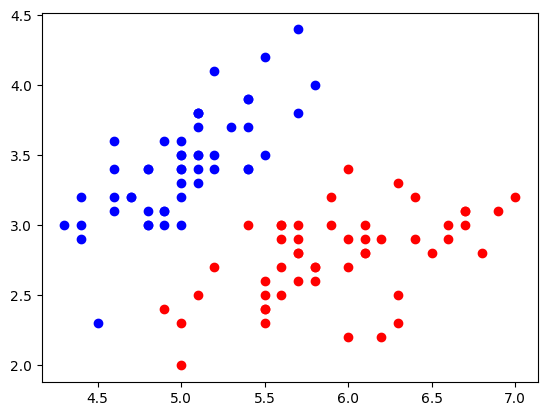

In [17]:
import matplotlib.pyplot as plt
plt.scatter(X[y==0,0], X[y==0,1], color='blue')
plt.scatter(X[y==1,0], X[y==1,1], color='red')
#plt.scatter(X[y==2,0], X[y==2,1], color='cyan')

In [21]:
X=iris.data[iris.target!=2, 0:2]
print(X.shape)
y=iris.target[iris.target!=2]
SVMmodel_1=SVC(kernel='linear')

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,y,test_size=0.2)
SVMmodel_1.fit(X_train_1,y_train_1)
#SVMmodel.get_params()
SVMmodel_1.score(X_test_1,y_test_1)


(100, 2)


1.0

[[ 2.22259847 -2.22229408]]
[-5.0017702]


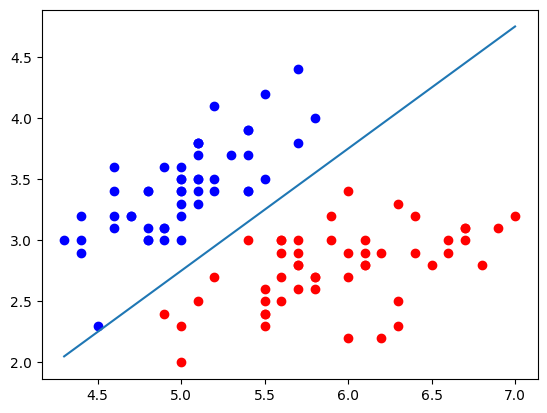

In [35]:
supvectors=SVMmodel_1.support_vectors_
# Plot the support vectors here


#Separating line coefficients:
W=SVMmodel_1.coef_
b=SVMmodel_1.intercept_
print(W)
print(b)

import numpy as np
x1 = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
x2 = -b/W[0,1]-W[0,0]/W[0,1]*x1
#xpoints = np.array([4, 7.5])
#ypoints = np.array([2, 4.5])
plt.scatter(X[y==0,0], X[y==0,1], color='blue')
plt.scatter(X[y==1,0], X[y==1,1], color='red')
#plt.plot(xpoints, ypoints) # just training line
plt.plot(x1,x2) # better line



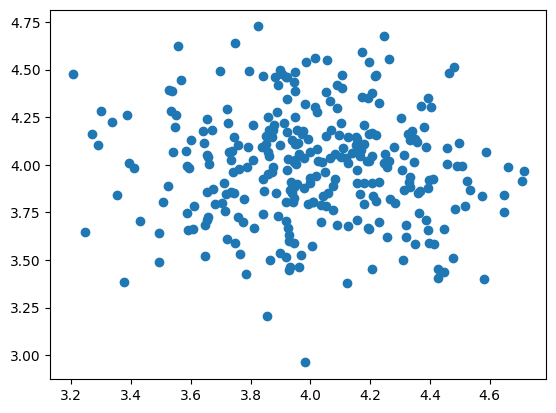

In [36]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



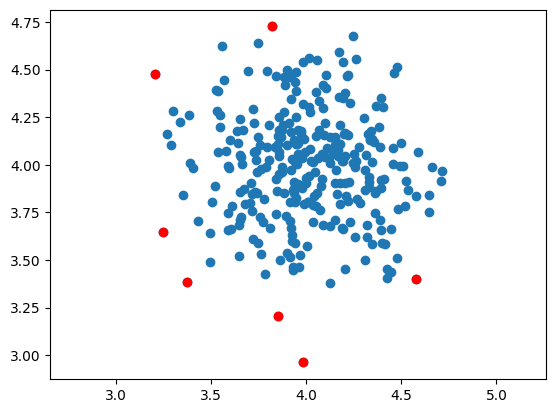

In [37]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



8.989098620408397


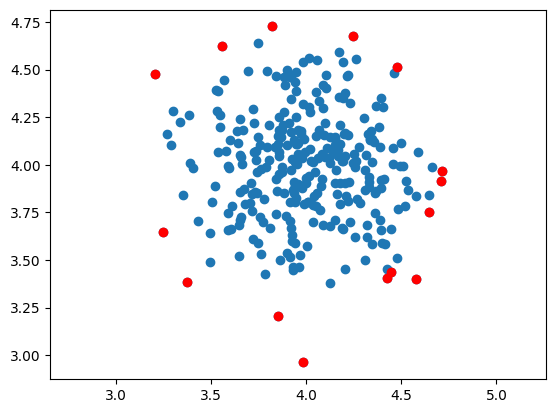

In [45]:
scores = SVMmodelOne.score_samples(x)
#print(scores)
thresh = quantile(scores, 0.05)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()
